In [1]:
from src.tools import Observation
import os
import pandas as pd
import numpy as np
from astropy.time import Time
import astropy.units as u
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:214: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=pd.TimedeltaIndex(timestamp_event,unit='s'),columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:214: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=pd.TimedeltaIndex(timestamp_event,unit='s'),columns=['c_event']).resample('1s',loffset=pd.Timedelt

statistics in 70-370 keV for a grbalpha-INTEGRAL at 2023-02-07 04:40:45.260000:
peak time [utc]: 2023-02-07 04:40:33.876717
SNR at peak: 13.726
count rate [cnt/s] above background at peak: 322.497 +- 23.495
T90 [s]: 10
SNR in T90: 28.446
counts above background in T90: 1883.049 +- 66.197

statistics in 70-890 keV for a grbalpha-INTEGRAL at 2023-02-07 04:40:45.260000:
peak time [utc]: 2023-02-07 04:40:33.876717
SNR at peak: 13.418
count rate [cnt/s] above background at peak: 335.438 +- 25.0
T90 [s]: 11
SNR in T90: 27.478
counts above background in T90: 2034.331 +- 74.034



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:292: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


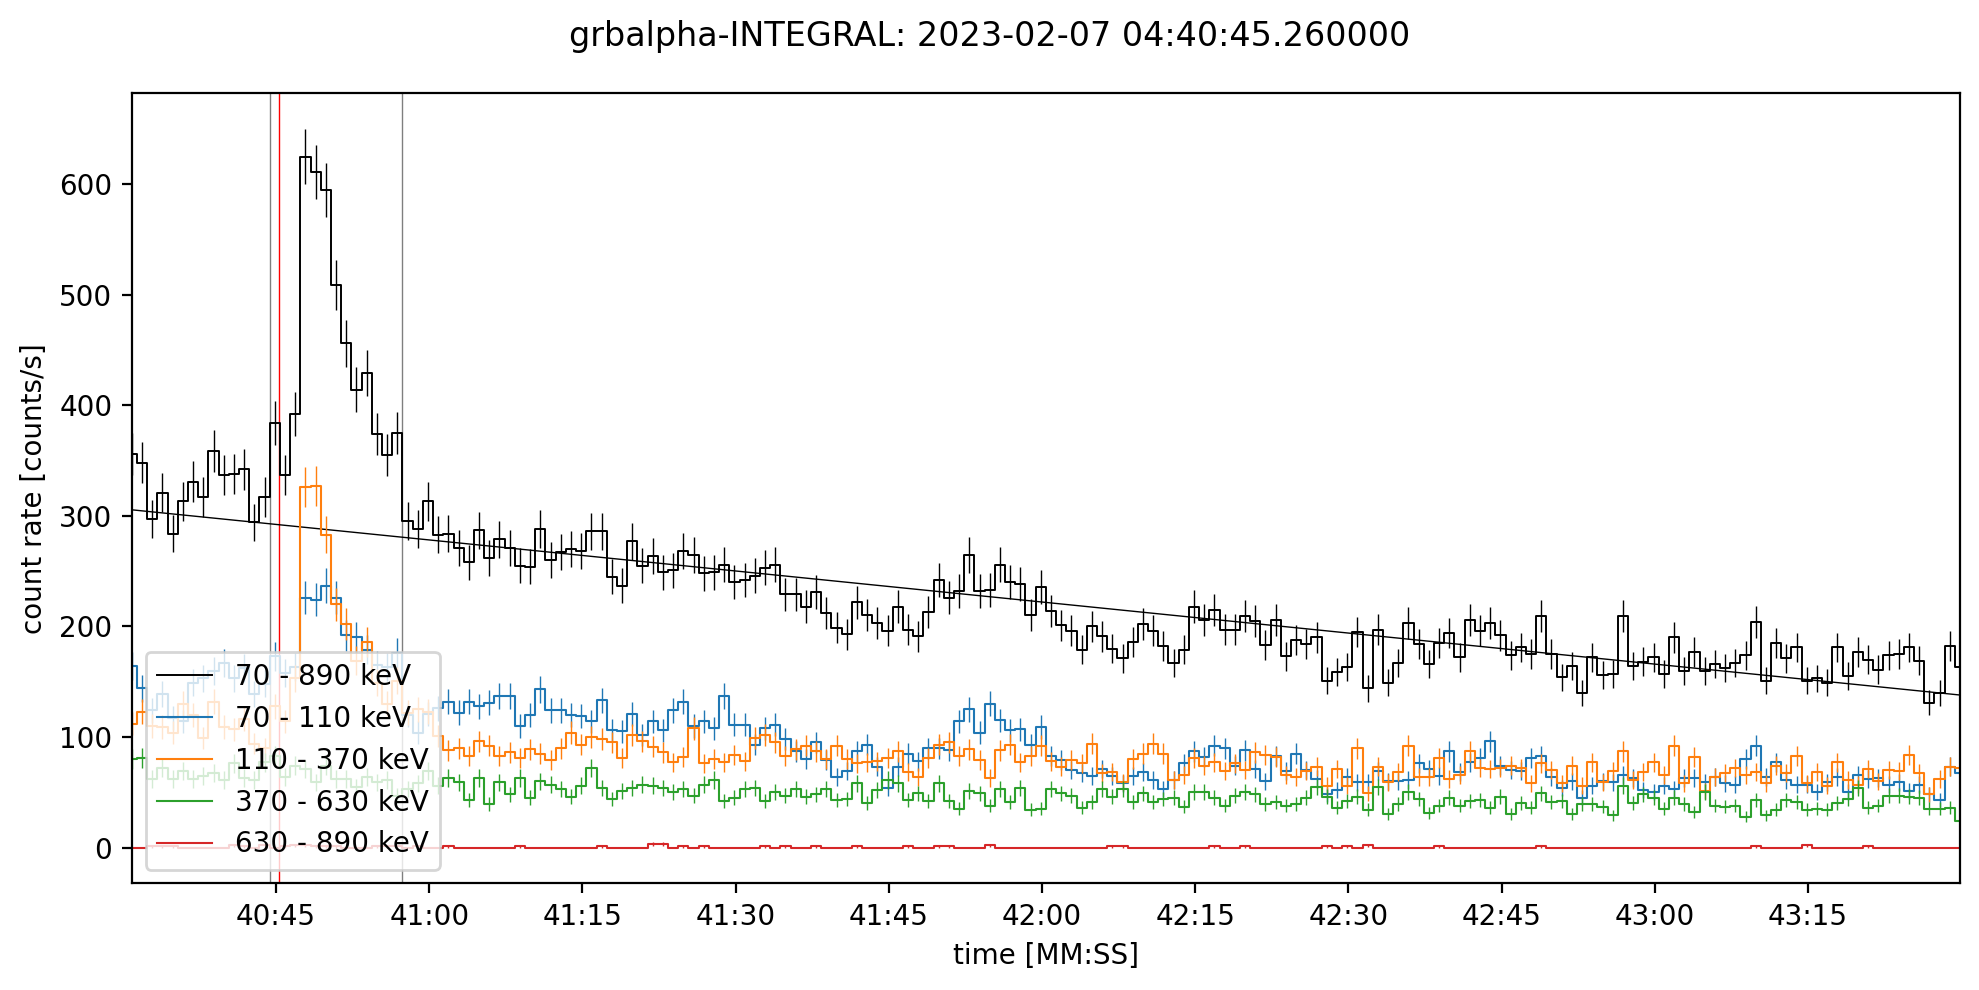

In [270]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\"
n = 35
time,cubesat,mission,filename,ra,dec = df.time[n],df.cubesat[n],df.mission[n],df.filename[n],df.ra[n],df.dec[n]
obs = Observation(path+filename)
obs.check_event(time,cubesat+'-'+mission,dtvalue_left=0.25,dtvalue_right=2.75,
                llim=14,rlim=27,fit_function='linear',#second_locator=[0],
                save_path='C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\confirmed\\')
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file(path=r'C:\Users\maria\Desktop\CubeSats\SGRJ1806-20_list.txt')
        # sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr}")# \n SF:\n {sf}")

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:214: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=pd.TimedeltaIndex(timestamp_event,unit='s'),columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:214: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=pd.TimedeltaIndex(timestamp_event,unit='s'),columns=['c_event']).resample('1s',loffset=pd.Timedelt

statistics in 70-370 keV for a CALET at 2023-02-27 04:39:17:
peak time [utc]: 2023-02-27 04:37:18.877458
SNR at peak: 2.5
count rate [cnt/s] above background at peak: 42.506 +- 17.0
T90 [s]: 6
SNR in T90: -5.429
counts above background in T90: -213.114 +- 39.256

statistics in 70-890 keV for a CALET at 2023-02-27 04:39:17:
peak time [utc]: 2023-02-27 04:37:24.877463
SNR at peak: 2.621
count rate [cnt/s] above background at peak: 54.088 +- 20.64
T90 [s]: 3
SNR in T90: -4.776
counts above background in T90: -173.836 +- 36.401



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


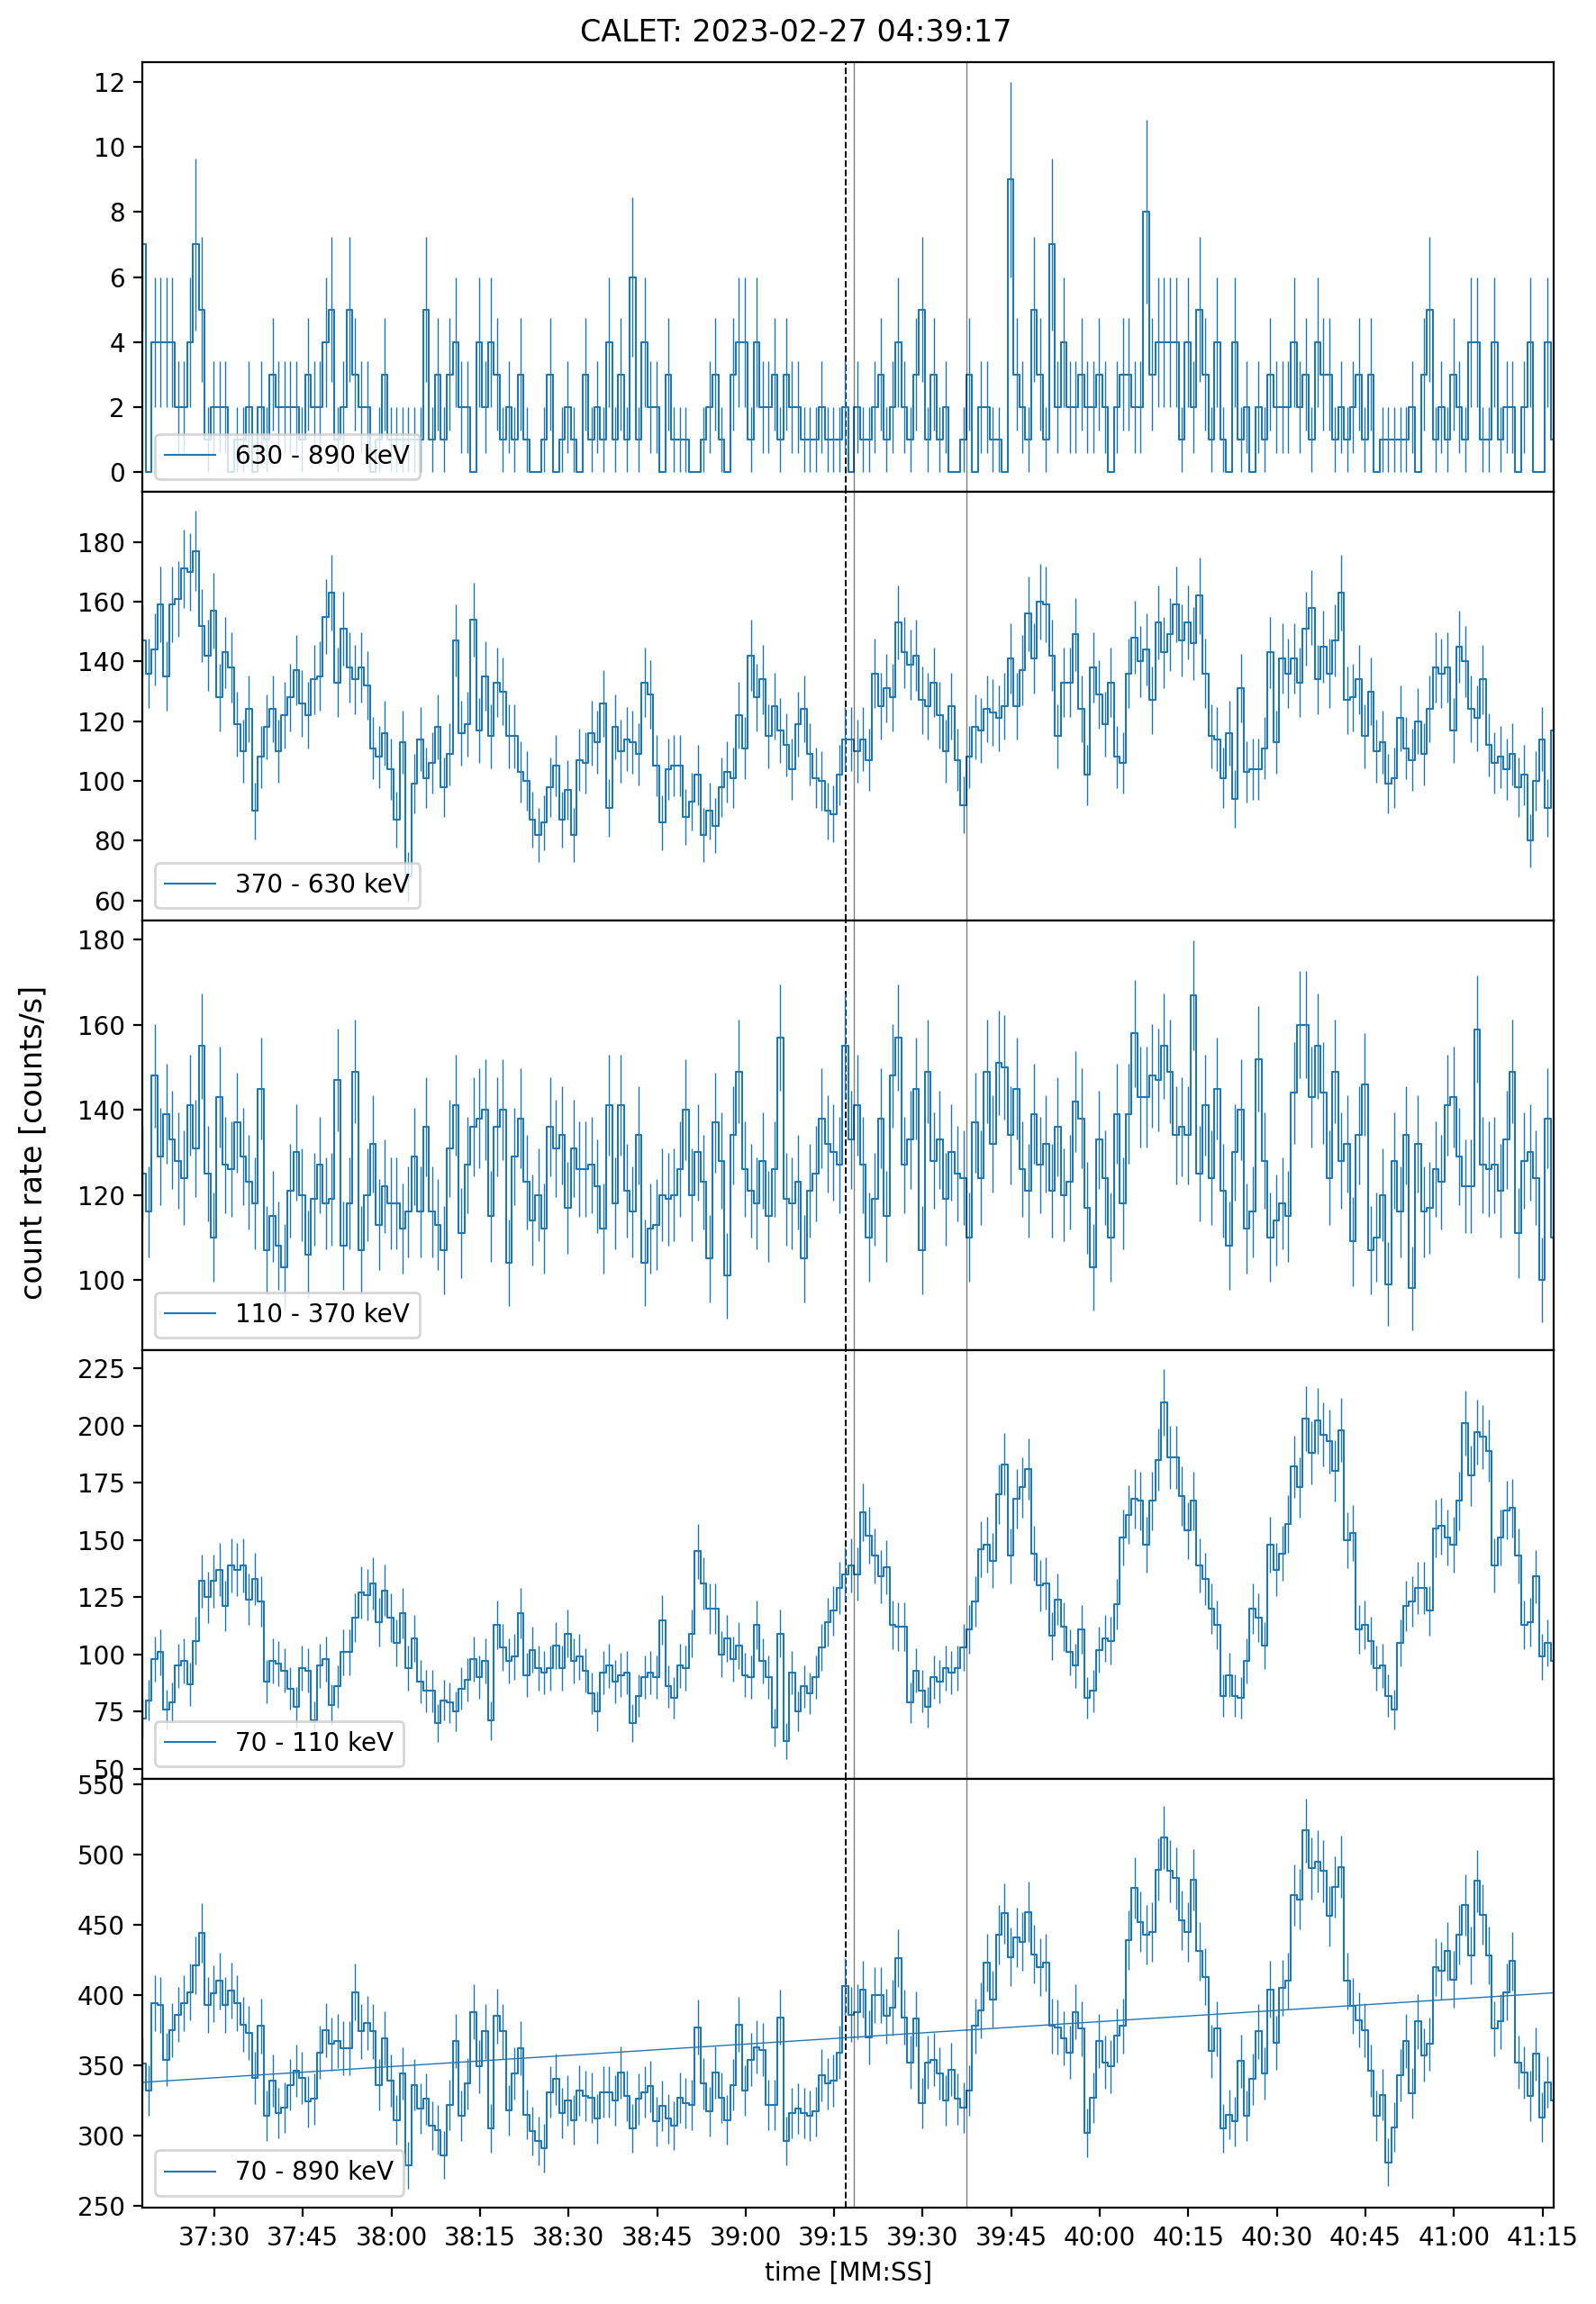

In [2]:
path = r"C:\Users\maria\Desktop\CubeSats\GRBs\files\r23b27a_114048.json"
time = '2023-02-27 04:39:17'

event_type = 'CALET'

obs = Observation(path)
obs.check_event(time,event_type,llim=121,rlim=140,dtvalue_left=2,dtvalue_right=2,save_path=None)#,second_locator=[0,30])#,fit_function='polynom')
# ra = 255.658
# dec = 51.462
# obs.plot_skymap(time,event_type,ra,dec)

In [10]:
time = '2023-02-25 11:16:00'
obs.longitude[time],obs.latitude[time]

(utc
 2023-02-25 11:16:00.877    32.9828
 Name: lon, dtype: float64,
 utc
 2023-02-25 11:16:00.877   -78.7373
 Name: lat, dtype: float64)

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:50: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filepath,skiprows=8,sep='\s+\s+')
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.exp_time = pd.read_csv(filepath,skiprows=8,sep='\s+\s+',usecols=['exposure(s)'])['exposure(s)'][0]
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:53: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted a

statistics in 40-370 keV for a VZLUSAT2u0-GRB at 2023-01-26 18:20:44.450000:
peak time [utc]: 2023-01-26 18:20:46.500000
SNR at peak: 3.367
count rate [cnt/s] above background at peak: 43.513 +- 12.923
T90 [s]: 15
SNR in T90: 5.345
counts above background in T90: 259.779 +- 48.6

statistics in 40-890 keV for a VZLUSAT2u0-GRB at 2023-01-26 18:20:44.450000:
peak time [utc]: 2023-01-26 18:20:46.500000
SNR at peak: 2.837
count rate [cnt/s] above background at peak: 40.224 +- 14.177
T90 [s]: 15
SNR in T90: 4.79
counts above background in T90: 262.552 +- 54.809



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:292: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return # file with values


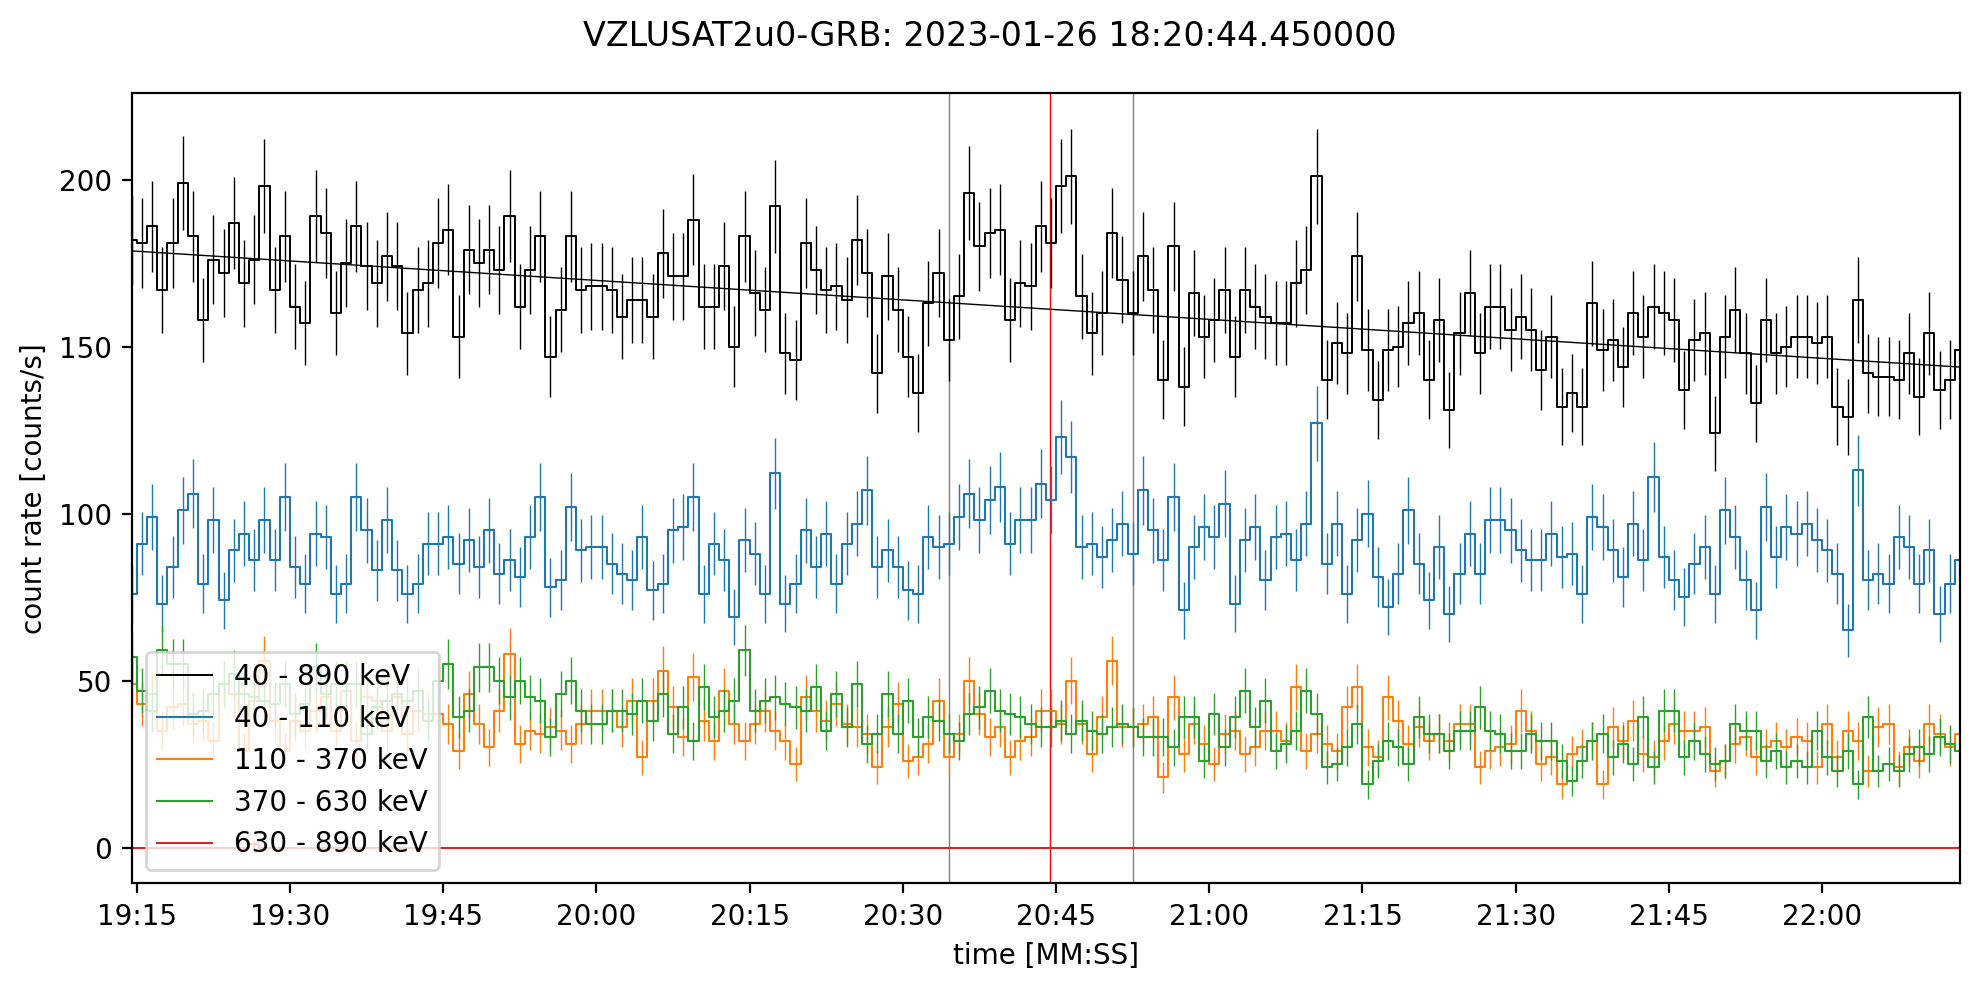

In [66]:
path = r'C:\Users\maria\Desktop\CubeSats\vzlusat2\grbs\GRB230126A_unit0.txt'
event_type = 'VZLUSAT2u0-GRB'

obs = Observation(path)
time = '2023-01-26 18:20:44.450' #obs.is_GRB_in_file()[0][0]
obs.check_event(time,event_type,llim=81,rlim=98,dtvalue_left=1.5,dtvalue_right=1.5)#,fit_function='polynom')#,second_locator=[0,30])#,fit_function='polynom')


In [52]:
time = '2023-01-14 20:43:00'
obs.longitude[time],obs.latitude[time]

(exp_end_time
 2023-01-14 20:43:00.500    52.64
 dtype: float64,
 exp_end_time
 2023-01-14 20:43:00.500   -77.173
 dtype: float64)

In [5]:
for i in reversed(range(5)):
    print(i)

4
3
2
1
0
